<a href="https://colab.research.google.com/github/mugureeDOTcom/IP-Week-7/blob/main/Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Descriptive Statistics
1. Defining the Question
a) Problem Statement
The Question

We are investigating the claim that the number of Blue cars taken in postal code 75015 is greater on weekdays than in area 75017.

Hypothesis

Null hypothesis: The number of Blue cars taken in area 75017 on weekdays is not greater than in postal code 75015.

Alternate hypothesi: The number of Blue cars taken in postal code 75015 is greater on weekdays than in area 75017.

b) Data Description
Random variable

Blue cars taken is the random variable which we will investigate in different days and areas.

The end goal of this analysis is answer the question by to carry out the following processes:

. Data cleaning: Find and deal with outliers, anomalies, and missing data within the dataset.

. Data exploration:Perform univariate, bivariate and multivariate analysis and record observations.

.Implement the solution by performing hypothesis testing.

Understanding the context

Investigate a claim that the blue cars from the provided dataset as we work as a Data Scientist for the Autolib  service company.

Recording the Experimental Design

First data cleaning then Univariate, bivariate and multivariate summaries, sampling and finally hypothesis testing.

c) Hypothesis testing procedure
sampling
Stating the hypothesis 
3.Choose the significance level.
Use test statistic.


In [2]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#loading the data set

sns.set_style()
url ="/content/autolib_daily_events_postal_code (1).csv"
dataset = pd.read_csv(url)


In [ ]:
#reading the top data

dataset.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#reading the bottom data

dataset.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#data types

dataset.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
#info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
#columns names

dataset.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#finding missing data

dataset.isnull().values.any()

False

In [ ]:
#confirming no missing data

dataset.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

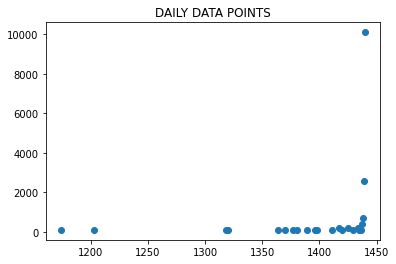

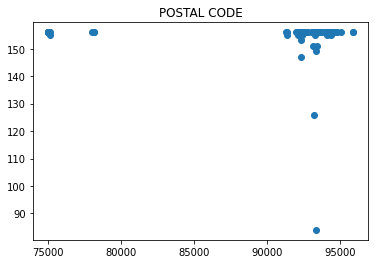

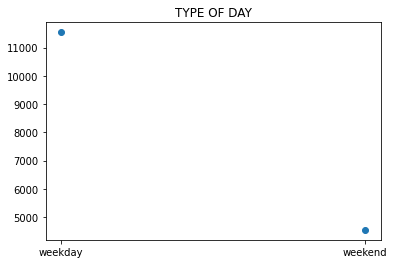

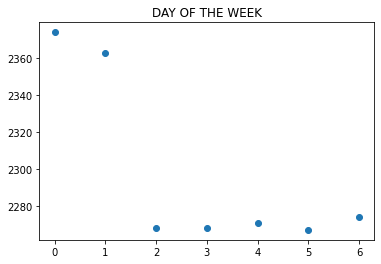

In [ ]:
#check outliers

#daily data points
dailydata_outlier=dataset['n_daily_data_points'].value_counts().rename_axis('n_daily_data_points').reset_index(name='counts')
plt.scatter(dailydata_outlier['n_daily_data_points'],dailydata_outlier['counts'])
plt.title('DAILY DATA POINTS')
plt.show()

#postal code
postalcode_outlier=dataset['Postal code'].value_counts().rename_axis('Postal code').reset_index(name='counts')
plt.scatter(postalcode_outlier['Postal code'],postalcode_outlier['counts'])
plt.title('POSTAL CODE')
plt.show()

#day_type
daytype_outlier=dataset['day_type'].value_counts().rename_axis('day_type').reset_index(name='counts')
plt.scatter(daytype_outlier['day_type'],daytype_outlier['counts'])
plt.title('TYPE OF DAY')
plt.show()

#day of the week
dayofweek_outlier=dataset['dayOfWeek'].value_counts().rename_axis('dayOfweek').reset_index(name='counts')
plt.scatter(dayofweek_outlier['dayOfweek'],dayofweek_outlier['counts'])
plt.title('DAY OF THE WEEK')
plt.show()


In [ ]:
#checking for anomalies

dataset1= dataset.drop(['date','day_type'], axis=1)

columns = ['Postal code','n_daily_data_points','dayOfWeek','BlueCars_taken_sum','BlueCars_returned_sum','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum']

fig, ax = plt.subplots(len(columns), figsize=(8,80))
for i, col_val in enumerate(columns):
  sns.boxplot(y=dataset[col_val], ax=ax[i])
  ax[i].set_title('BOX PLOT -{}'.format(col_val), fontsize=12)
  ax[i].set_xlabel(col_val, fontsize=10)

# UNIVARIATE ANALYSIS

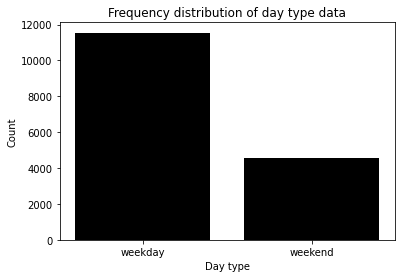

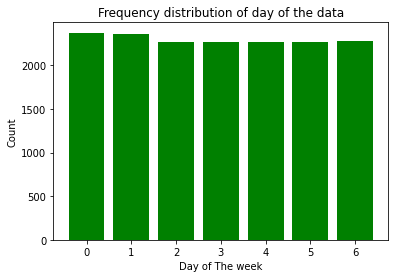

In [ ]:
#on categorical data
#day type
dataset_1=dataset['day_type'].value_counts().rename_axis('day_type').reset_index(name='counts')
dataset_1

plt.bar(dataset_1['day_type'],dataset_1['counts'], color='black')
plt.title('Frequency distribution of day type data')
plt.xlabel('Day type')
plt.ylabel('Count')
plt.show()

# day of the week
dataset_2=dataset['dayOfWeek'].value_counts().rename_axis('dayOfWeek').reset_index(name='counts')
dataset_2

plt.bar(dataset_2['dayOfWeek'],dataset_2['counts'], color='green')
plt.title('Frequency distribution of day of the data')
plt.xlabel('Day of The week')
plt.ylabel('Count')
plt.show()



                  Conclusion

WEEKDAYS ARE MUCH MORE BUSIER THAN THE WEEKEND.
SPECIFICALLY  MONDAY.

#BIVARIATE ANALYSIS

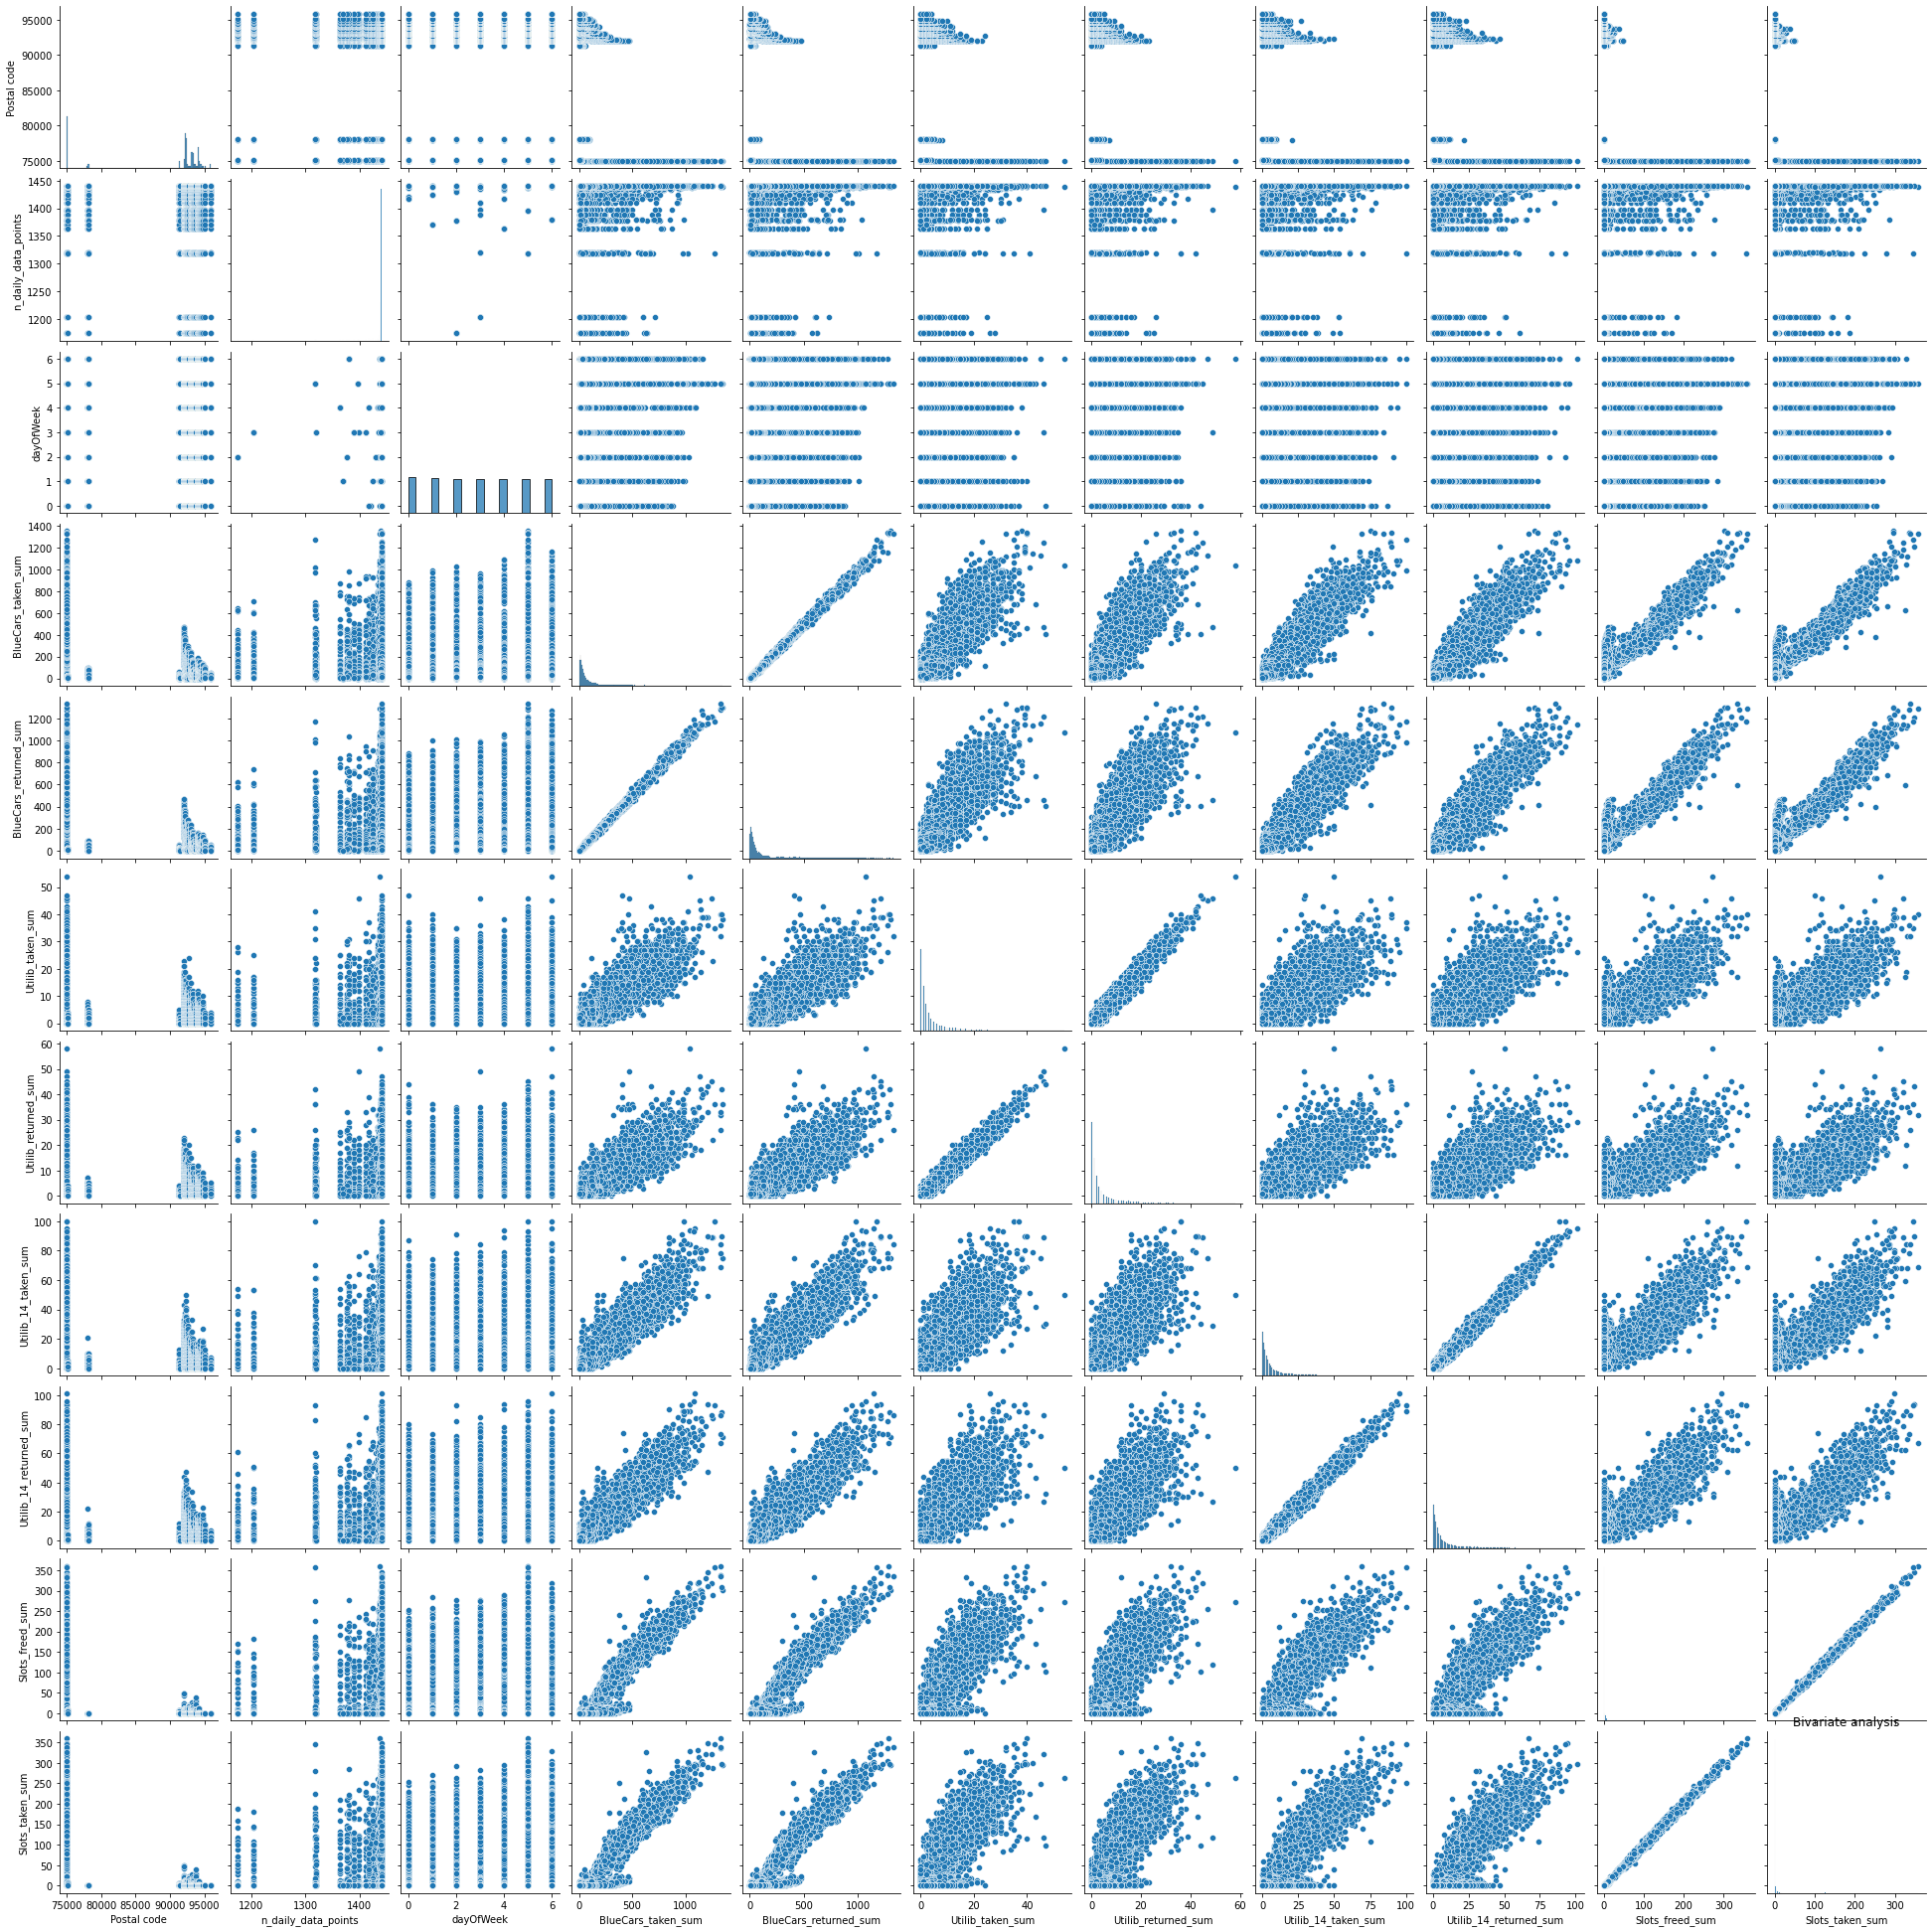

In [6]:
sns.pairplot(dataset)
plt.title('Bivariate analysis')
plt.show()

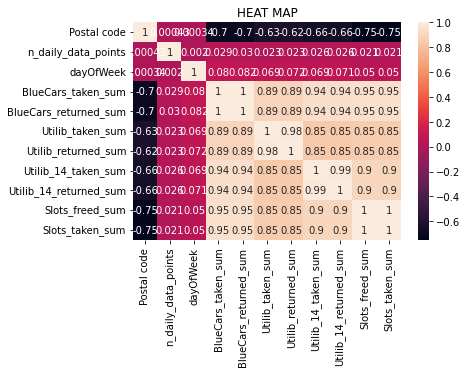

In [7]:
sns.heatmap(dataset.corr(),annot=True)
plt.title('HEAT MAP')
plt.show()

In [ ]:
#plotting scatter matrix
#pd.plotting.scatter_matrix(dataset)

#plt.tight_layout()
#plt.show()

In [ ]:
#since weekdays are busier than weekends; we drop the weekends.

#samples
dataset.drop(dataset.index[dataset['day_type' ]== 'weekend'], inplace= True)
dataset
#my area of interest is postal cocde 75015 and 75017
#75015
x =dataset.loc[dataset['Postal code']== 75015]
x

dataset_sample_2=x.sample(n = 15,replace="False")
dataset_sample_2


In [ ]:
#samples
y =dataset.loc[dataset['Postal code']== 75017]
y

dataset_sample_1=y.sample(n = 15,replace="False")
dataset_sample_1

HYPOTHESIS IMPLEMENTATION

In [48]:
alpha=0.05

print(np.var(dataset_sample_2['BlueCars_taken_sum']), np.var(dataset_sample_1['BlueCars_taken_sum']))

14337.44888888889 2221.395555555556


In [52]:
ratio_check = np.var(dataset_sample_1['BlueCars_taken_sum'])/np.var(dataset_sample_2['BlueCars_taken_sum'])
print(ratio_check)

0.15493659804967627


T-TEST PERFOMED

In [58]:
import scipy.stats as stats

print(stats.ttest_ind(a=dataset_sample_2['BlueCars_taken_sum'], b=dataset_sample_1['BlueCars_taken_sum'], equal_var=True))

Ttest_indResult(statistic=6.19533102454809, pvalue=1.0837278964750354e-06)


PVALUE IS LESS THAN ALPHA 
THEREFORE REJECT THE NULL HYPOSTHESIS